# Dados e Aprendizagem Automática
### Part IX

## **K-means using Blobs Dataset - I**

#### Imports, installations and settings

Install *scikit-learn-extra*: <code>pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip</code>

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Create the dataset using Blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=2022)

#### Define X and y

In [5]:
X = data[0]
y = data[1]

#### Visualize the data

View the first 5 lines of the data set:

In [7]:
print('X:',X[0:5,:])
print('y:',y[0:5])

X: [[  5.88508997   2.9021639 ]
 [ -8.20429992 -11.68670283]
 [  1.9125188   -2.76746603]
 [ -9.39601207  -7.2830252 ]
 [  6.1986976    7.32152342]]
y: [2 1 2 1 3]


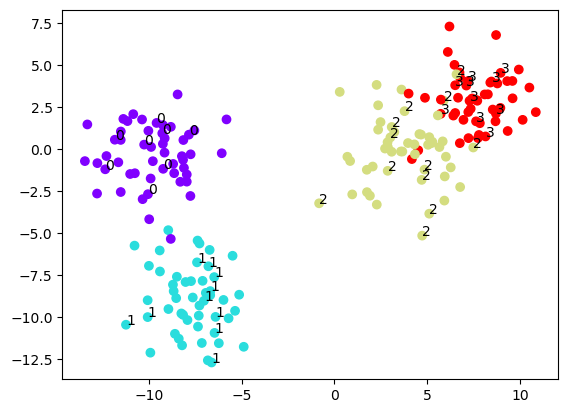

In [8]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0],X[i,1]))

### Create the clusters

#### With K-Means https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=4,n_init=10,random_state=2022)

In [12]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=2022)

Center of the 4 clusters

In [13]:
kmeans.cluster_centers_

array([[-7.68797564, -8.88054369],
       [ 7.70499062,  2.96975295],
       [-9.78544862, -0.2509739 ],
       [ 3.60428123, -0.21752545]])

Associated labels

In [14]:
kmeans.labels_

array([1, 0, 3, 0, 1, 2, 0, 2, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 0, 3, 0, 3, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 2, 1, 2, 1, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 3, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       0, 2, 2, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 0, 0, 1, 3,
       2, 0, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 3, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 2, 3, 1, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 1, 1, 2, 3, 2, 3, 3, 0, 2, 1, 2, 0,
       2, 2], dtype=int32)

#### Visualize the clusters

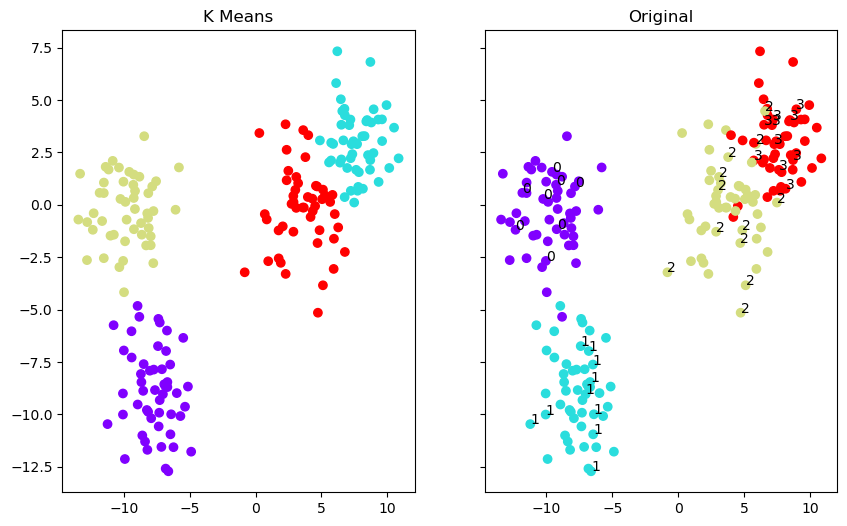

In [17]:
f, (ax1, ax2) = plt.subplots(1,2,sharey = True, figsize = (10, 6))
ax1.set_title('K Means')
ax1.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = 'rainbow')
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0],X[i,1]))

##### Align K-Means prediction class with real values

In [18]:
y_pred = kmeans.predict(X)

In [19]:
y_pred

array([1, 0, 3, 0, 1, 2, 0, 2, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 0, 3, 0, 3, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 2, 1, 2, 1, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 3, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       0, 2, 2, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 0, 0, 1, 3,
       2, 0, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 3, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 2, 3, 1, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 1, 1, 2, 3, 2, 3, 3, 0, 2, 1, 2, 0,
       2, 2], dtype=int32)

In [20]:
y

array([2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       2, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 3, 2, 1, 0, 2, 0, 1,
       0, 0])

In [21]:
y_pred = np.where(y_pred==0,10 , y_pred)
y_pred = np.where(y_pred==2,0 , y_pred)
y_pred = np.where(y_pred==3, 2, y_pred)
y_pred = np.where(y_pred==1, 3, y_pred)
y_pred = np.where(y_pred==10, 1, y_pred)

In [22]:
y_pred

array([3, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 3, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 1, 0, 3, 0, 1,
       0, 0], dtype=int32)

#### Redo the visualizations

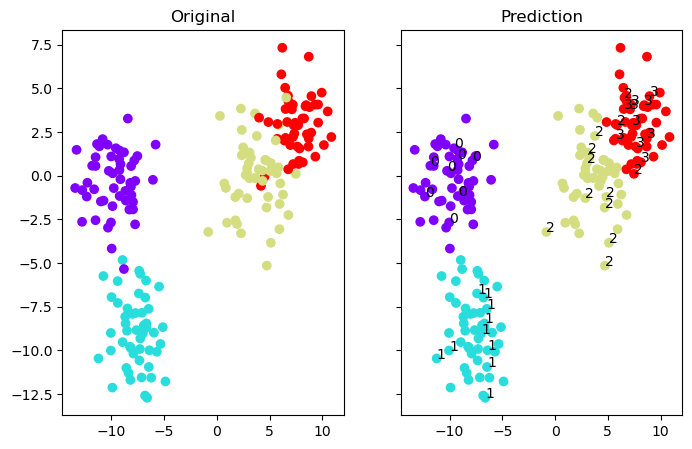

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (8, 5))
ax1.set_title('Original')
ax1.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
ax2.set_title("Prediction")
ax2.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0], X[i,1]))
#plt.savefig()

#### Evaluate the model

In [26]:
print(confusion_matrix(y,y_pred))

[[49  1  0  0]
 [ 0 50  0  0]
 [ 0  0 46  4]
 [ 0  0  3 47]]


In [27]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50
           2       0.94      0.92      0.93        50
           3       0.92      0.94      0.93        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

